<a href="https://colab.research.google.com/github/snufkin92/colab_tutorial/blob/master/section_06/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# サポートベクターマシン
サポートベクターマシン（Support Vector Machine、SVM）とは、パターン識別のための教師あり機械学習の手法です。  
「マージン最大化」というアイディアに基づいているのですが、しばしば優れたパターン識別能力を発揮します。



## ●サポートベクターマシンとは？  
簡単にするために、2つの特徴量を持つデータを2つのグループに分類する絵を使います。

**（図: サポートベクターマシンの概念）**

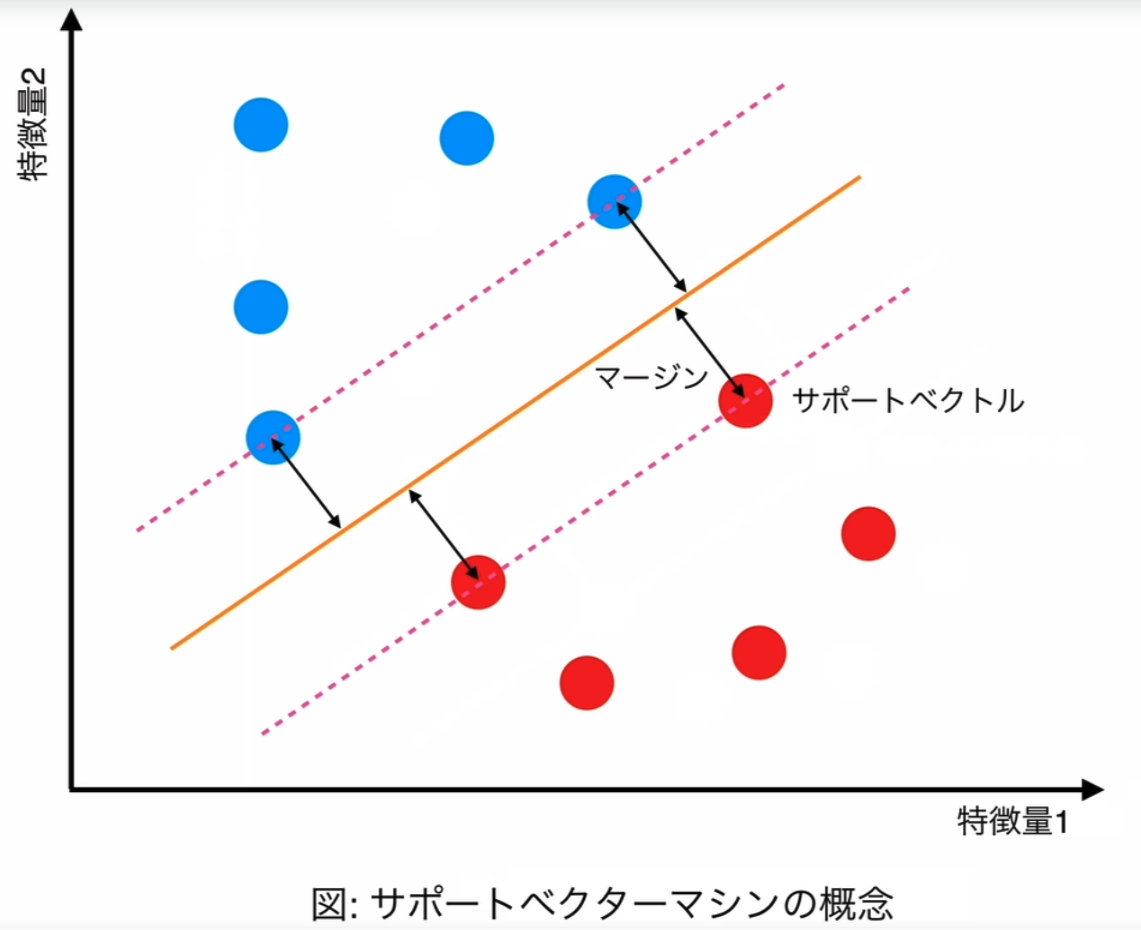



サポートベクターマシンとは、グループを明確に分ける境界線を引くための手法です。  
こちらの図の例では、赤と青のクラスを明確に分ける境界線を引いています。  

この図で特徴量は2つ（２次元）なので境界は線になりますが、3次元の場合は境界は面になります。  
数学的に、直線や平面を一般化とした概念に「超平面」があります。  
線形サポートベクターマシンでは、この超平面を使ってn次元のデータの境界を定めます。  

上の図における直線の引き方ですが、「マージン最大化」により決定されます。  
この場合のマージンは、境界となる線からもっとも近い点との距離のことです。  
この場合は、赤と青それぞれのグループから線に最も近い2つずつの点のマージンを最大化するように線を引いています。  
このようなマージンの最大化に使われる境界付近の点を、サポートベクトルと呼びます。
マージンを最大化するために、赤のグループからも青のグループからももっとも遠い境界線を引くことになります。  

この境界線は「分類器」として機能し、新しいデータがどちらのグループに属するかを判別することができます。

## ●データセットの読み込み
今回は、scikit-learnに含まれるワインのデータセットを使用します。

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)  # data: 説明変数
wine_df["class"] = wine.target  # target: 目的変数
wine_df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  class  
0                          3.92   1065.0      0  
1                          3.40   1050.0      0  
2                          3.17   1185.0      0  
3                          3.45   1480.0      0  
4                          2.93    735.0      0

データセットの説明を表示します。

In [2]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

各統計量を表示します。

In [3]:
wine_df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

            class  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

ライブラリseabornの`pairplot`により、説明変数同士、及び説明変数と目的変数の関係を一覧表示します。

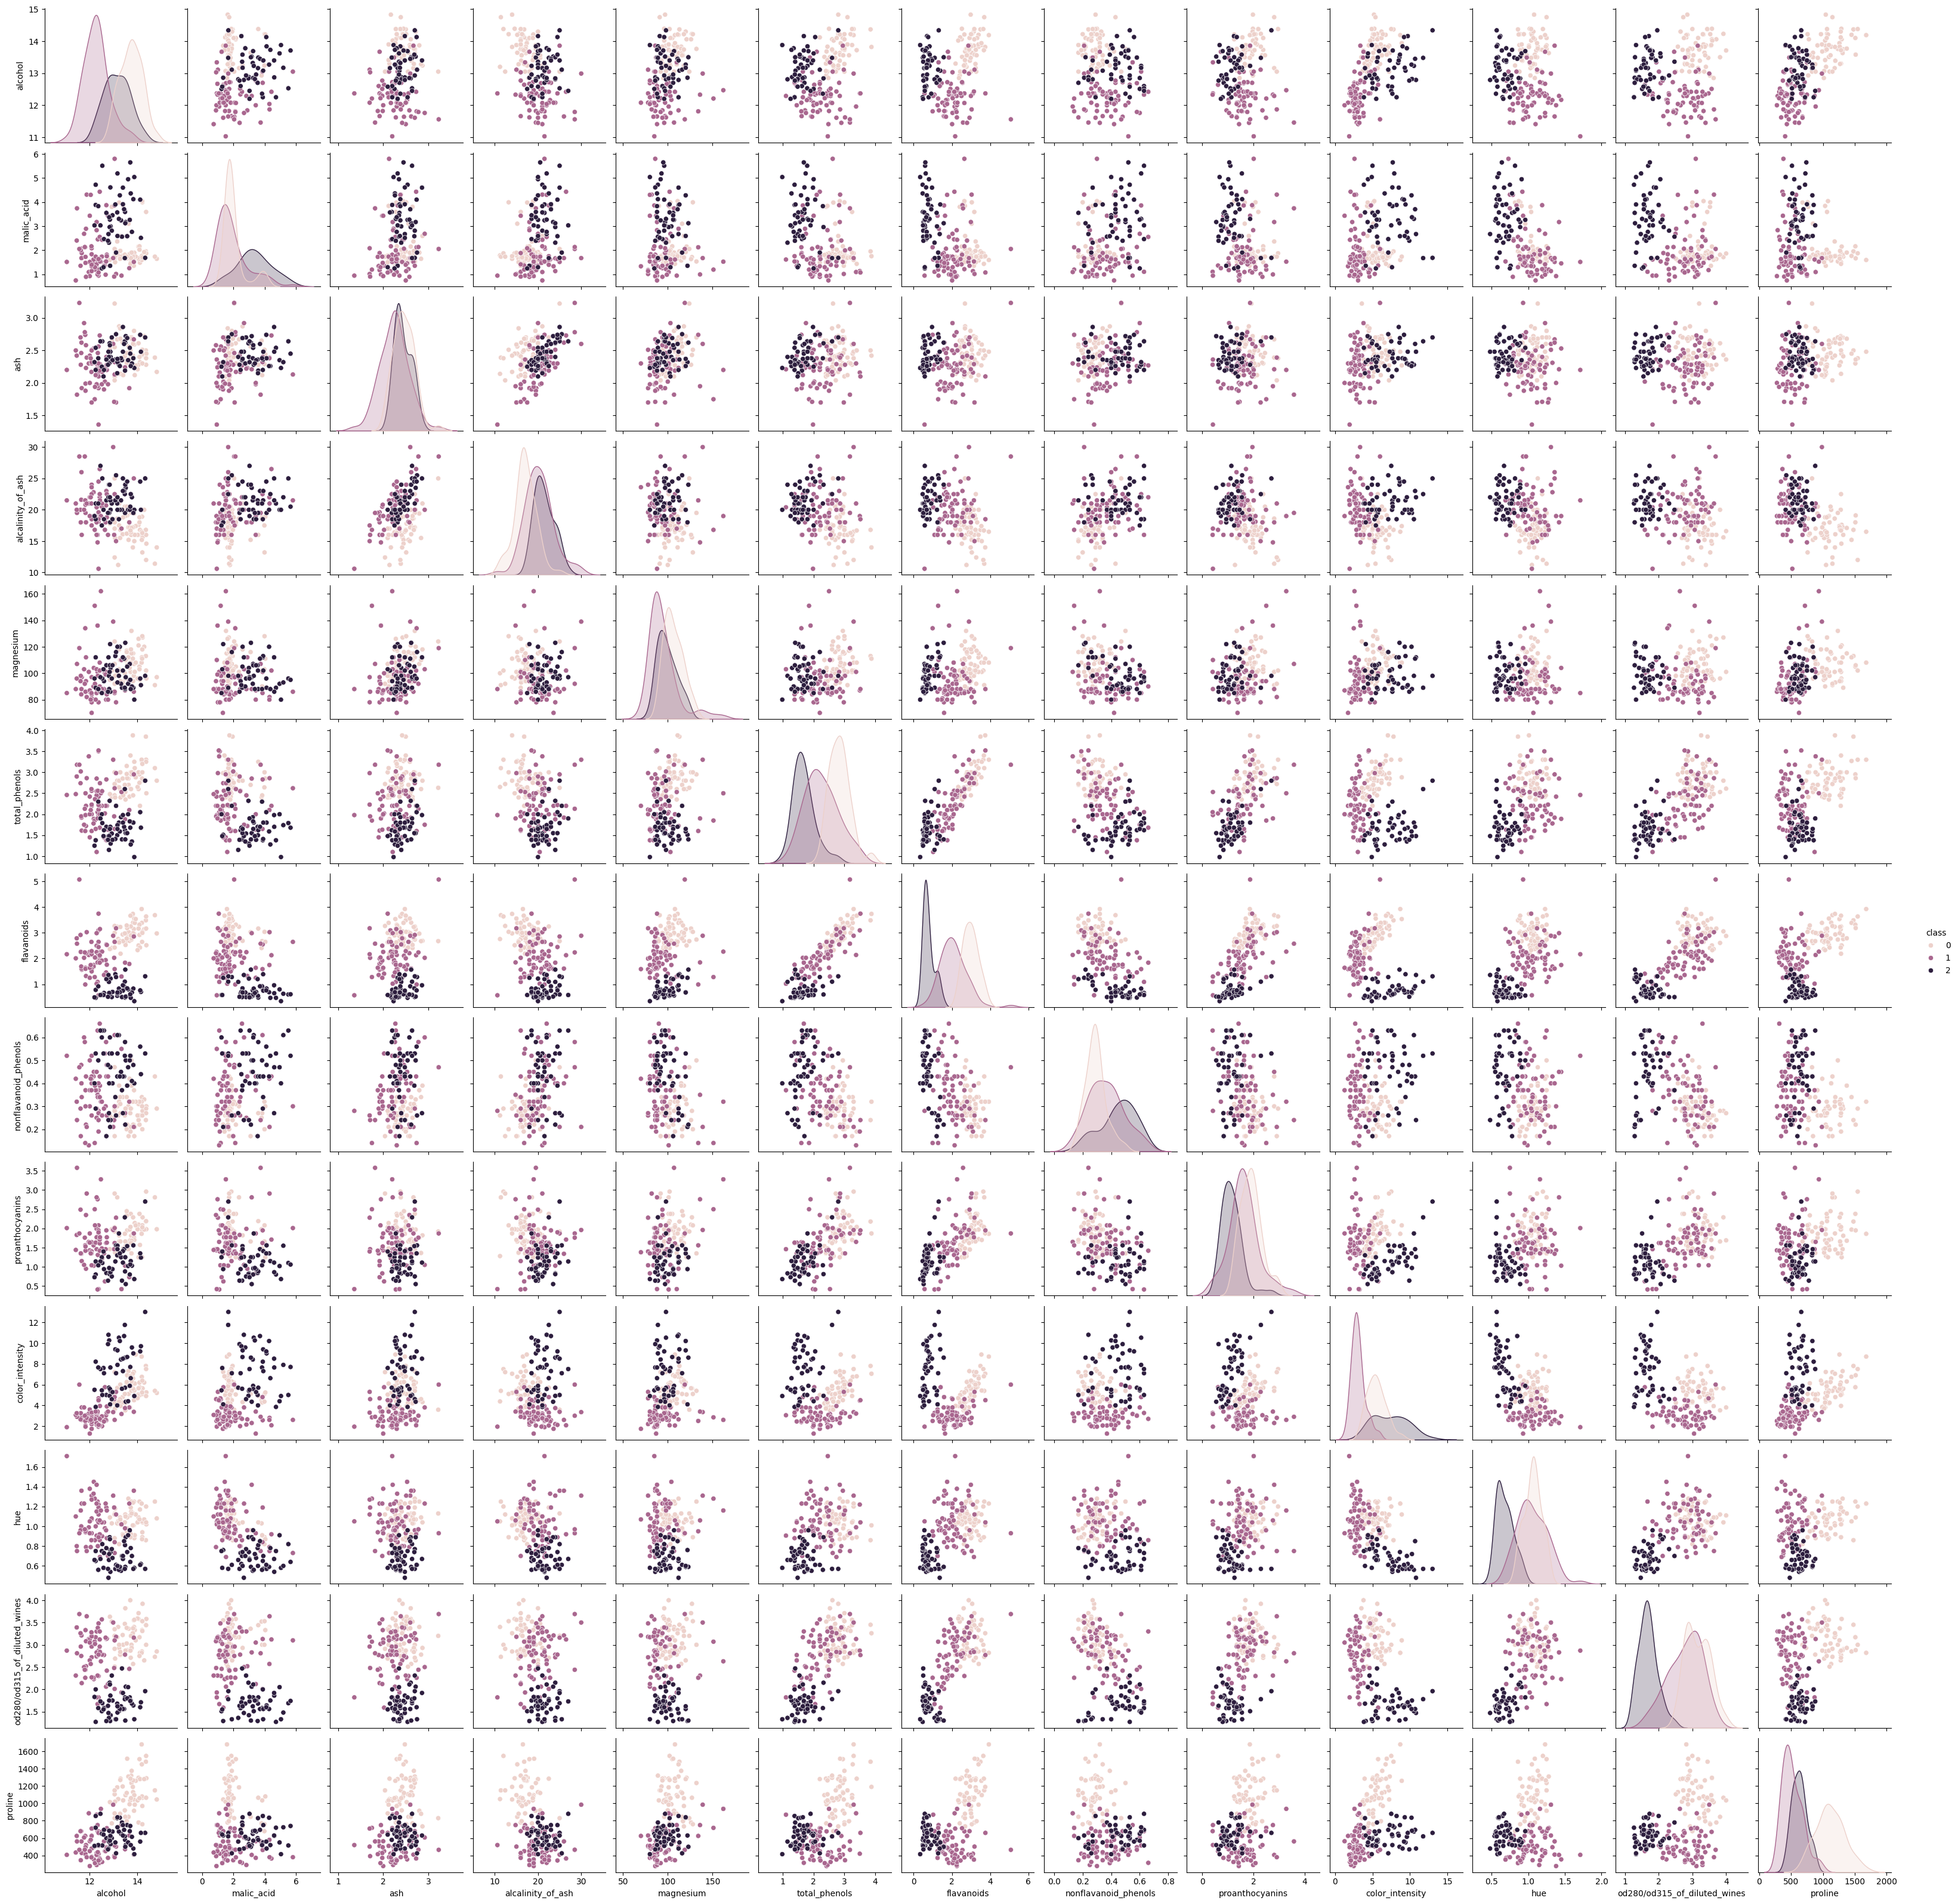

In [4]:
import seaborn as sns

sns.pairplot(wine_df, hue="class")

## ●SVMの実装
サポートベクターマシンを使い、ワインの分類を行います。  
まずは、データセットを訓練用のデータとテスト用のデータに分割し、標準化します。

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 訓練データとテストデータに分割
x_train, x_test, t_train, t_test = train_test_split(wine.data, wine.target, random_state=0)

# データの標準化(平均値を０　標準偏差を１にする)
std_scl = StandardScaler()
std_scl.fit(x_train)

# インスタンスを落とし、後日、未知のデータを推論するために標準化器を保存する必要がある
# joblib.dump(std_scl, 'std_scaler.pkl')
# std_scl.transform(x_test)をする必要はない
x_train = std_scl.transform(x_train)
x_test = std_scl.transform(x_test)

In [12]:
pd.DataFrame(x_train).describe()

0             1             2             3             4   \
count  1.330000e+02  1.330000e+02  1.330000e+02  1.330000e+02  1.330000e+02   
mean   1.928282e-15 -1.389031e-15 -1.068485e-16  2.323956e-15 -3.539358e-16   
std    1.003781e+00  1.003781e+00  1.003781e+00  1.003781e+00  1.003781e+00   
min   -2.459340e+00 -1.342165e+00 -3.710701e+00 -2.537563e+00 -2.110744e+00   
25%   -7.859786e-01 -6.983452e-01 -5.738226e-01 -6.867884e-01 -7.940691e-01   
50%    6.319001e-02 -4.390290e-01 -2.025583e-02 -3.425379e-03 -1.703810e-01   
75%    7.999687e-01  7.591908e-01  7.178332e-01  5.660438e-01  4.533072e-01   
max    2.186112e+00  2.914198e+00  3.153527e+00  2.986288e+00  4.264735e+00   

                 5             6             7             8             9   \
count  1.330000e+02  1.330000e+02  1.330000e+02  1.330000e+02  1.330000e+02   
mean  -8.623010e-16  6.978545e-16 -1.168656e-15  6.143791e-16 -7.412617e-16   
std    1.003781e+00  1.003781e+00  1.003781e+00  1.003781e+00  1.003781e+00   
min   -1.901186e+00 -1.515623e+00 -1.836746e+00 -1.986454e+00 -1.599682e+00   
25%   -9.191508e-01 -9.550052e-01 -7.377674e-01 -7.673338e-01 -7.942244e-01   
50%   -1.007879e-01  8.468668e-02 -1.882782e-01 -8.262243e-02 -2.141277e-01   
75%    7.830441e-01  8.491660e-01  6.752047e-01  5.853887e-01  6.205437e-01   
max    2.648912e+00  1.817507e+00  2.323672e+00  3.290834e+00  3.291492e+00   

                 10            11            12  
count  1.330000e+02  1.330000e+02  1.330000e+02  
mean  -6.611253e-16  5.609548e-16 -5.092000e-17  
std    1.003781e+00  1.003781e+00  1.003781e+00  
min   -1.751894e+00 -1.821590e+00 -1.448847e+00  
25%   -7.627025e-01 -1.004929e+00 -7.770609e-01  
50%    1.144733e-02  2.546667e-01 -2.475746e-01  
75%    6.995805e-01  8.083352e-01  7.783050e-01  
max    3.280080e+00  1.957197e+00  2.638125e+00

In [13]:
# x_trainで標準化器を作っているので平均が０でないことに注意
pd.DataFrame(x_test).describe()

0          1          2          3          4          5   \
count  45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
mean    0.006024  -0.193225   0.015008  -0.019244  -0.196560   0.217101   
std     1.054367   0.981319   1.049109   0.783774   0.942597   1.078075   
min    -1.984805  -1.476294  -2.455949  -1.569466  -1.556355  -2.097593   
25%    -0.798466  -0.769881  -0.721440  -0.544421  -0.863368  -0.755478   
50%     0.063190  -0.564216  -0.167874  -0.003425  -0.308978   0.357495   
75%     0.912359   0.177965   0.644024   0.423677   0.453307   1.126757   
max     2.286014   3.048327   3.190431   2.559186   2.185774   2.059690   

              6          7          8          9          10         11  \
count  45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
mean    0.291719  -0.066170  -0.122703  -0.090782   0.172012   0.140549   
std     1.040316   0.901809   0.800730   0.858197   0.917692   0.920491   
min    -1.648133  -1.522752  -2.003154  -1.299201  -2.009944  -1.738540   
25%    -0.506511  -0.659269  -0.583631  -0.777531  -0.289611  -0.437419   
50%     0.319127  -0.345275  -0.116023  -0.088927   0.398522   0.351559   
75%     1.042834   0.439709   0.435086   0.307542   0.742589   0.822177   
max     3.183376   2.088177   1.403702   2.373354   1.860805   1.708046   

              12  
count  45.000000  
mean   -0.038207  
std     1.159696  
min    -1.561362  
25%    -0.892886  
50%    -0.297214  
75%     0.976862  
max     3.078261

今回は、線形サポートベクターマシンを使い、超平面によりデータを分類します。  

In [6]:
from sklearn.svm import LinearSVC  # 線形ベクターマシン

model = LinearSVC(random_state=0)

# 全ての説明変数を使い学習
model.fit(x_train, t_train)

LinearSVC(random_state=0)

訓練済みのモデルを使い、訓練データ及びテストデータで予測を行います。  
そして、その正解率を測定します。  

In [18]:
from sklearn.metrics import accuracy_score

# 予測結果
y_train = model.predict(x_train)
y_test = model.predict(x_test)
print("### y_train=\n", y_train)
print("### t_train=\n", t_train)

# 正解率
acc_train = accuracy_score(t_train, y_train)
acc_test = accuracy_score(t_test, y_test)
print(f"acc_train={acc_train}, acc_test={acc_test}")

### y_train=
 [0 2 1 2 0 2 2 0 2 0 1 2 2 1 2 2 0 1 2 1 1 2 1 0 1 1 1 0 0 1 1 2 2 1 1 1 2
 2 0 2 1 1 1 1 1 0 0 1 0 2 0 2 0 0 1 0 1 1 0 2 1 0 1 1 1 2 0 2 2 0 0 1 2 0
 0 1 1 0 0 0 2 1 0 1 2 0 1 2 2 0 0 2 0 2 1 0 0 1 0 2 1 2 0 2 2 2 0 1 1 1 1
 2 2 1 1 0 1 2 2 0 0 2 1 1 1 0 0 0 1 1 1 0 2]
### t_train=
 [0 2 1 2 0 2 2 0 2 0 1 2 2 1 2 2 0 1 2 1 1 2 1 0 1 1 1 0 0 1 1 2 2 1 1 1 2
 2 0 2 1 1 1 1 1 0 0 1 0 2 0 2 0 0 1 0 1 1 0 2 1 0 1 1 1 2 0 2 2 0 0 1 2 0
 0 1 1 0 0 0 2 1 0 1 2 0 1 2 2 0 0 2 0 2 1 0 0 1 0 2 1 2 0 2 2 2 0 1 1 1 1
 2 2 1 1 0 1 2 2 0 0 2 1 1 1 0 0 0 1 1 1 0 2]
acc_train=1.0, acc_test=1.0


全てのデータのグループ分け結果を、グラフ表示します。

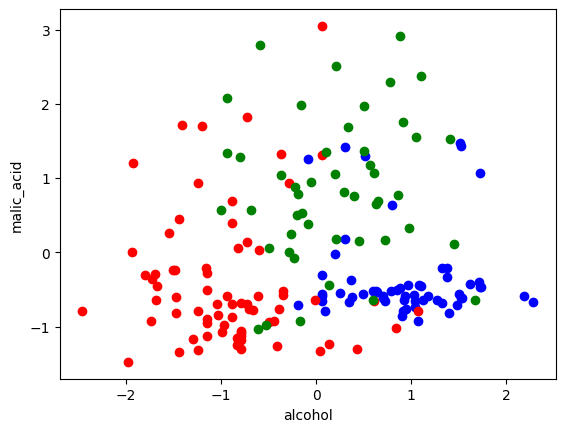

In [8]:
import matplotlib.pyplot as plt

axis_1 = 0
axis_2 = 1

x = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])
t = np.concatenate([t_train, t_test])

# 0にクラス分類されたグループ
group_0 = x[y==0]
plt.scatter(group_0[:, axis_1], group_0[:, axis_2], c="blue")

# 1にクラス分類されたグループ
group_1 = x[y==1]
plt.scatter(group_1[:, axis_1], group_1[:, axis_2], c="red")

# 2にクラス分類されたグループ
group_2 = x[y==2]
plt.scatter(group_2[:, axis_1], group_2[:, axis_2], c="green")

plt.xlabel(wine.feature_names[axis_1])
plt.ylabel(wine.feature_names[axis_2])
plt.show()

なお、結果はハイパーパラーメータを調整することで変化します。  
例えば、LinearSVCの引数として渡すことが可能なハイパーパラメータCは、正則化のためのパラメータです。  
この値を大きくすれば、誤分類によるペナルティが大きくなり、境界が複雑になります。  
ハイパーパラーメータについては、以下の公式ドキュメントを参考にしてください。  
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html